In [1]:
from fastai.vision.all import *
from fastai.vision.gan import *
from fastai.metrics import error_rate, accuracy

# Define path to images, and size (images are of (size, size))

In [2]:
data_path = Path("./Smiles/")
size = 16

# All you gotta know is this imports all the training images into `data` and displays 8 of them

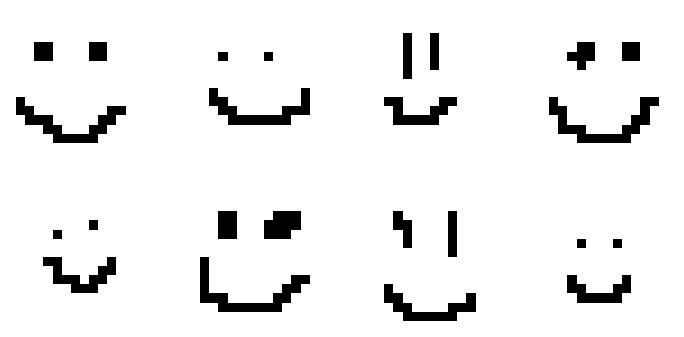

In [4]:
dblock = DataBlock(blocks = (TransformBlock, ImageBlock),
                   get_x = generate_noise,
                   get_items = get_image_files,
                   splitter = IndexSplitter([]),
                   batch_tfms = Normalize.from_stats(torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5])))

data = dblock.dataloaders(data_path, path=data_path, bs=8, num_workers=0)
data.show_batch(max_n=8)

# Define our GAN

In [8]:
generator = basic_generator(size, n_channels=3, n_extra_layers=1)
critic    = basic_critic   (size, n_channels=3, n_extra_layers=1, act_cls=partial(nn.LeakyReLU, negative_slope=0.2))

gan = GANLearner.wgan(data, generator, critic, opt_func = RMSProp)

# These are annoying when logged

In [9]:
gan.recorder.train_metrics=False
gan.recorder.valid_metrics=False

# Train for 15,000 epochs, if dataset is larger this should be lower.

In [ ]:
with gan.no_logging():
    gan.fit(15000, 2e-4, wd=0.)

# `show_results` generates images from GAN

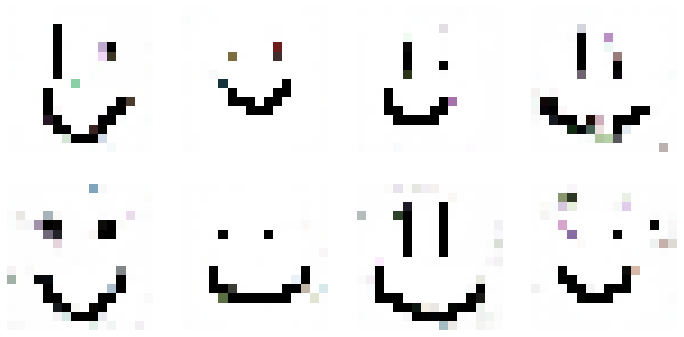

In [11]:
gan.show_results(max_n=16, ds_idx=0)

# Save model to file for future use

In [12]:
gan.save(file="smilegan")

Path('Smiles/models/smilegan.pth')